### **Cleaning Dataset**



In [1]:
# Install necessary packages
!pip install pandas nltk Sastrawi requests

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import os
import requests
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# URL of the dataset
url = 'https://raw.githubusercontent.com/RecognITE-Capstone-Bangkit/Machine-Learning/main/Dataset/dataset_final.csv'

# Check if the URL is accessible
response = requests.get(url)
if response.status_code != 200:
    raise FileNotFoundError(f"File not found: {url}")

# Load the dataset
df = pd.read_csv(url)
print(df.columns)  # Debugging: Check the column names

# Ensure 'sentences' column exists
if 'cleaned_text' not in df.columns:
    raise KeyError("'cleaned_text' column not found in the dataset")

# Convert the 'sentences' column to string type
df['cleaned_text'] = df['cleaned_text'].astype(str)

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove special characters specific to Twitter
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove retweets

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove non-ASCII characters
    text = ''.join(char for char in text if ord(char) < 128)

    # Remove repeated characters (e.g., 'helloooo' to 'hello')
    text = re.sub(r'(.)\1+', r'\1', text)

    # Remove emoticons
    emoticons = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', text)

    # Case folding (convert text to lowercase)
    text = text.lower()

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('indonesian'))  # Use Indonesian stopwords
    words = [word for word in words if word not in stop_words]

    # Join words back into a string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Apply the clean_text and stemmingIndo functions to the 'sentences' column
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)

# Display the cleaned dataset
print(df['cleaned_text'])

# Select relevant columns and save to CSV
df_clean = df[['cleaned_text', 'label']]

# Save the cleaned DataFrame to a CSV file
df_clean.to_csv('df_clean.csv', index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Index(['cleaned_text', 'label'], dtype='object')
0       kadang kemasan paket sesuai harapan kotor rusa...
1       kagum say beliau demokrat sejati walo militer ...
2       roti nya enak banget ice cream enak lokasi jal...
3                       bgt ayahmu kalo adikmu bgt mamamu
4       nya asri nyaman makanan harga nya mahal sampan...
                              ...                        
7238              orang kebanyakan sulit menghargai orang
7239           zaman pakai bahasa kampung dasar kampungan
7240    krn rakyat indonesia bodoh tdk membedakan yg y...
7241    lokasi makan lorong sempit mobil masuk jam buk...
7242         bagus kalo mingkem aja hahahahahaha jahatnya
Name: cleaned_text, Length: 7243, dtype: object


In [2]:
#sastrawi
'''def stemmingIndo(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

# Apply the clean_text and stemmingIndo functions to the 'sentences' column
df['cleaned_text'] = df['sentences'].apply(stemmingIndo)

# Display the cleaned dataset
print(df['cleaned_text'])'''

"def stemmingIndo(text):\n    factory = StemmerFactory()\n    stemmer = factory.create_stemmer()\n    return stemmer.stem(text)\n\n# Apply the clean_text and stemmingIndo functions to the 'sentences' column\ndf['cleaned_text'] = df['sentences'].apply(stemmingIndo)\n\n# Display the cleaned dataset\nprint(df['cleaned_text'])"

### **EDA**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/RecognITE-Capstone-Bangkit/Machine-Learning/main/Dataset/dataset_final.csv')

In [4]:
# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

                                        cleaned_text  label
0  kadang kemasan paket sesuai harapan kotor rusa...      2
1  kagum say beliau demokrat sejati walo militer ...      0
2  roti nya enak banget ice cream enak lokasi jal...      0
3                  bgt ayahmu kalo adikmu bgt mamamu      0
4  nya asri nyaman makanan harga nya mahal sampan...      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7243 entries, 0 to 7242
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cleaned_text  7241 non-null   object
 1   label         7243 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 113.3+ KB
None
             label
count  7243.000000
mean      0.726080
std       0.962034
min       0.000000
25%       0.000000
50%       0.000000
75%       2.000000
max       3.000000
cleaned_text    2
label           0
dtype: int64


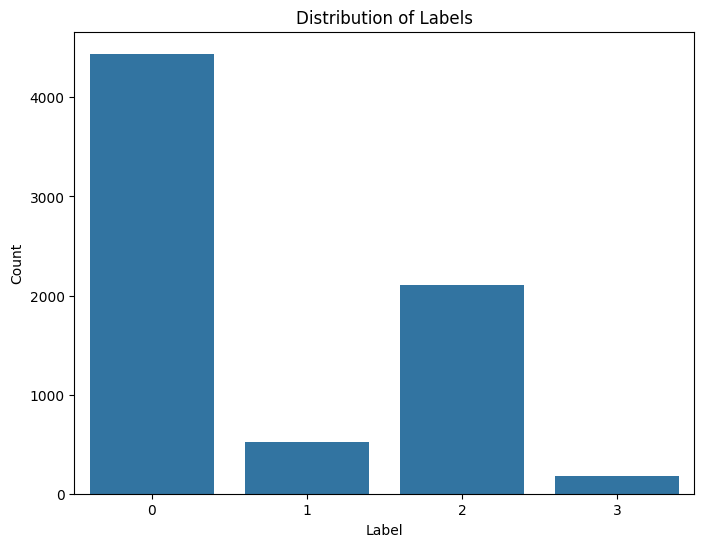

In [5]:
# Plot the distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


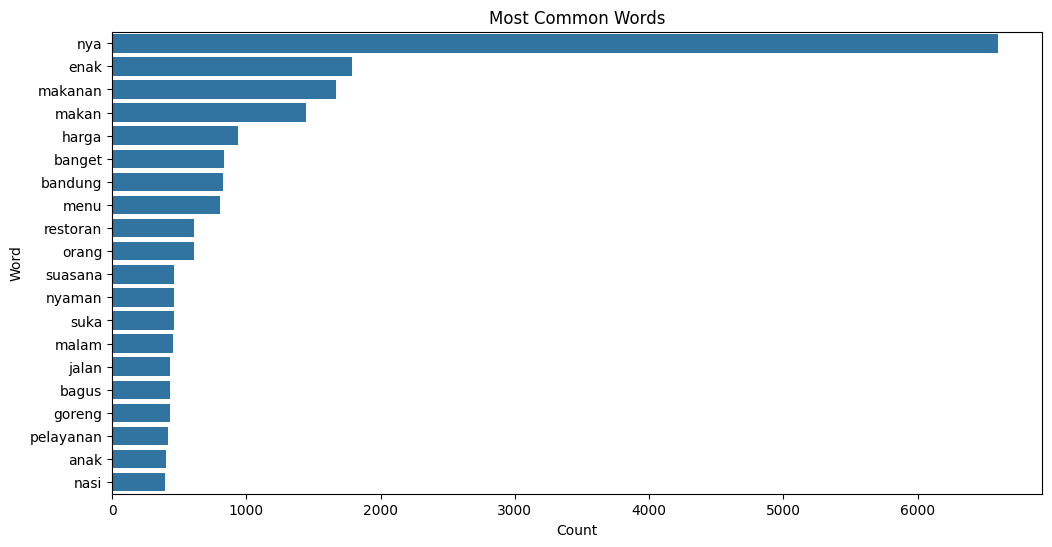

In [6]:
# Convert all values in the 'cleaned_text' column to strings
data['cleaned_text'] = data['cleaned_text'].astype(str)

# Now, try to concatenate all words again
all_words = ' '.join(data['cleaned_text'])
word_tokens = all_words.split()

# Get the most common words
common_words = Counter(word_tokens).most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


Label: 2
  nya: 1135
  orang: 288
  makanan: 179
  banget: 165
  makan: 164
  sih: 148
  indonesia: 142
  mahal: 139
  enak: 134
  harga: 131
  jokowi: 130
  xf: 108
  agama: 105
  x: 105
  gue: 104
  pelayanan: 96
  rakyat: 94
  presiden: 94
  islam: 90
  pakai: 88
Label: 0
  nya: 5362
  enak: 1649
  makanan: 1491
  makan: 1273
  harga: 807
  bandung: 779
  menu: 751
  banget: 615
  restoran: 547
  suasana: 436
  nyaman: 417
  malam: 409
  goreng: 397
  jalan: 368
  suka: 366
  bagus: 366
  nasi: 356
  ayam: 351
  teman: 333
  pemandangan: 331
Label: 1
  yg: 127
  ya: 95
  nya: 92
  aja: 91
  lu: 80
  gak: 76
  lo: 73
  ga: 63
  orang: 61
  anjing: 58
  si: 50
  muka: 48
  banget: 43
  udah: 43
  org: 43
  kaya: 37
  anak: 36
  kek: 36
  artis: 33
  sih: 31
Label: 3
  gacor: 116
  slot: 106
  link: 69
  shio: 41
  result: 37
  mei: 34
  daftar: 29
  bosku: 29
  pemenang: 29
  cuan: 28
  selamat: 28
  main: 27
  info: 27
  member: 24
  aja: 24
  situs: 24
  yuk: 17
  bonus: 17
  wd: 16

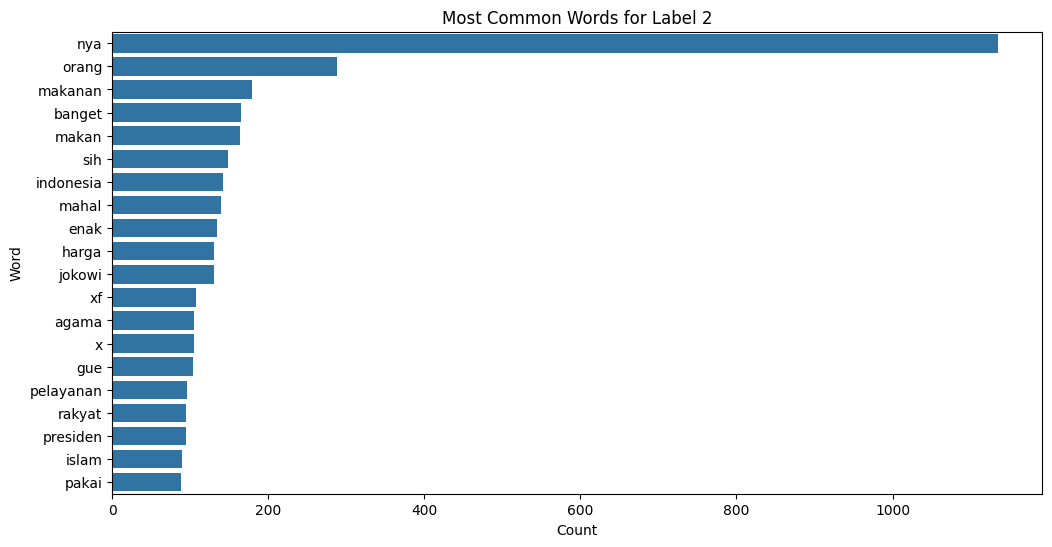

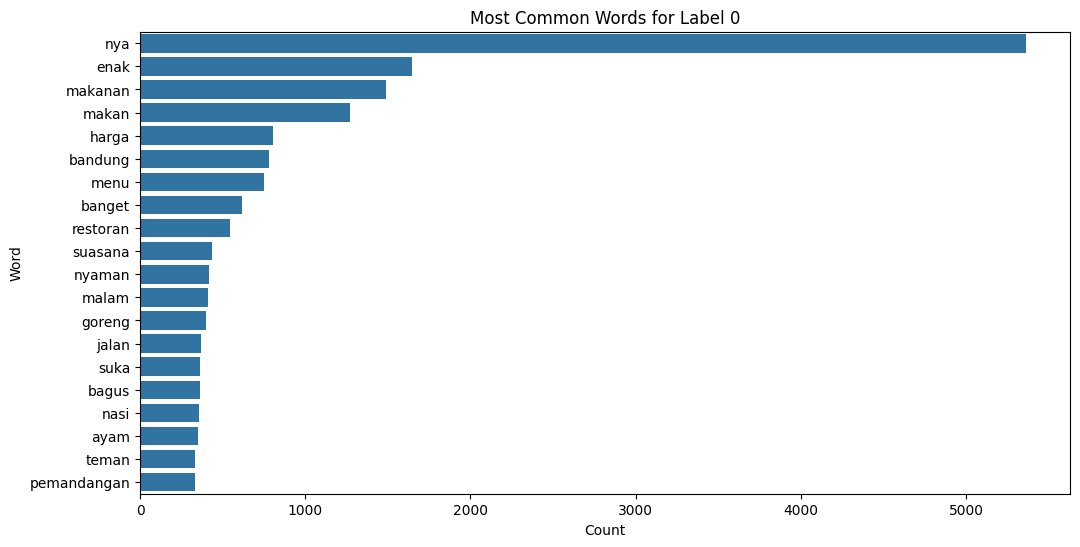

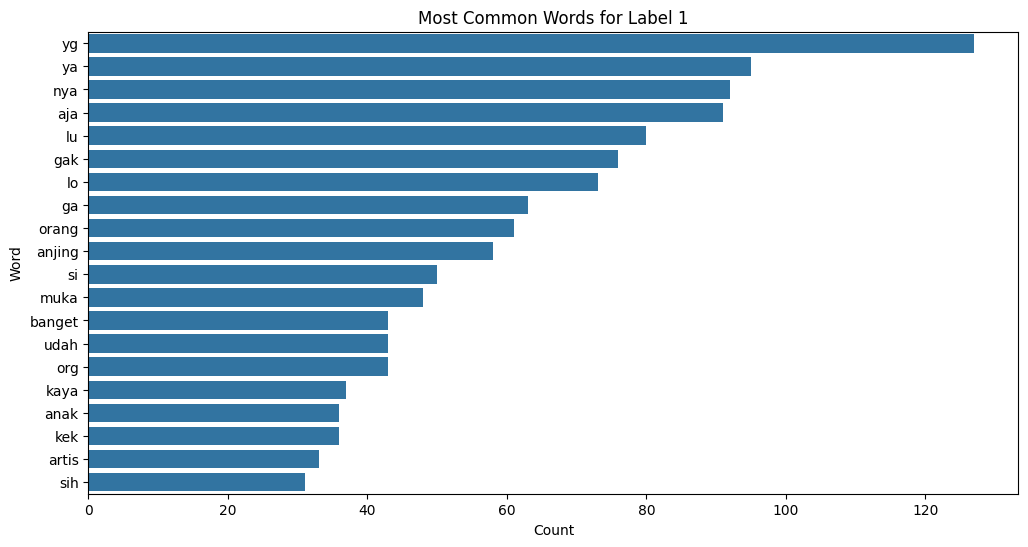

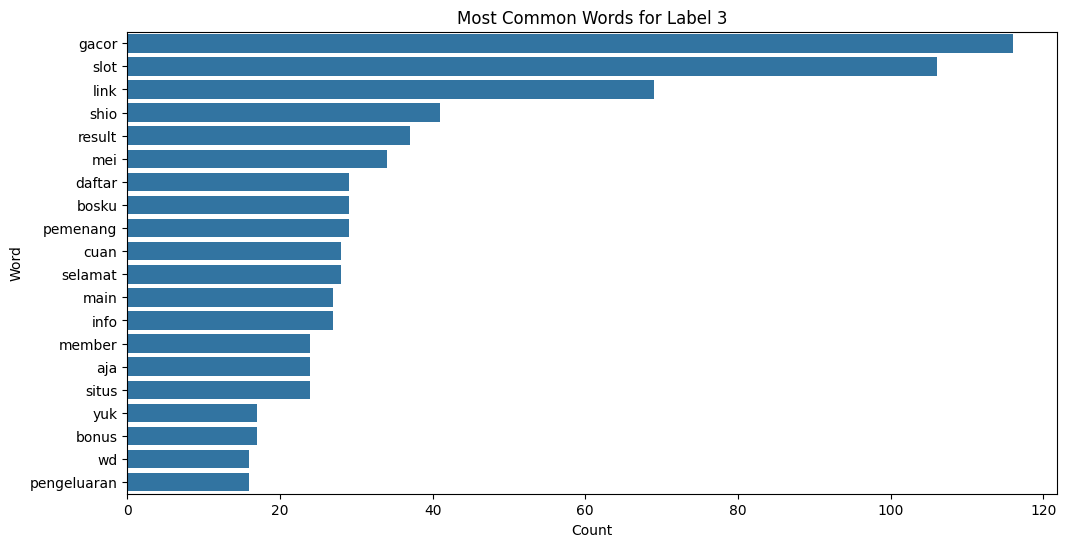

In [7]:
# Define a function to get common words by label
def get_common_words_by_label(data, label_col, text_col, top_n=20):
    labels = data[label_col].unique()
    common_words_by_label = {}

    for label in labels:
        label_data = data[data[label_col] == label]
        all_words = ' '.join(label_data[text_col])
        word_tokens = all_words.split()
        common_words = Counter(word_tokens).most_common(top_n)
        common_words_by_label[label] = common_words

    return common_words_by_label

# Get the most common words by label
common_words_by_label = get_common_words_by_label(data, 'label', 'cleaned_text')

# Print the most common words for each label
for label, common_words in common_words_by_label.items():
    print(f"Label: {label}")
    for word, count in common_words:
        print(f"  {word}: {count}")

# Define a function to plot the most common words for each label
def plot_common_words_by_label(common_words_by_label, top_n=20):
    for label, common_words in common_words_by_label.items():
        common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

        plt.figure(figsize=(12, 6))
        sns.barplot(x='count', y='word', data=common_words_df)
        plt.title(f'Most Common Words for Label {label}')
        plt.xlabel('Count')
        plt.ylabel('Word')
        plt.show()

# Plot the most common words for each label
plot_common_words_by_label(common_words_by_label)

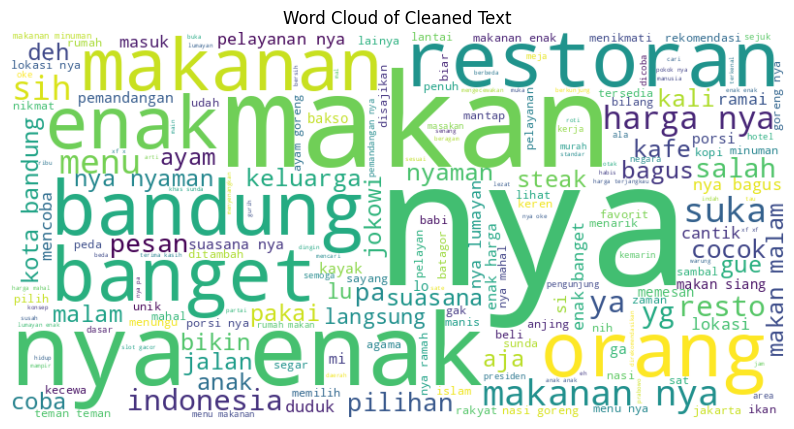

In [8]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Cleaned Text')
plt.axis('off')
plt.show()


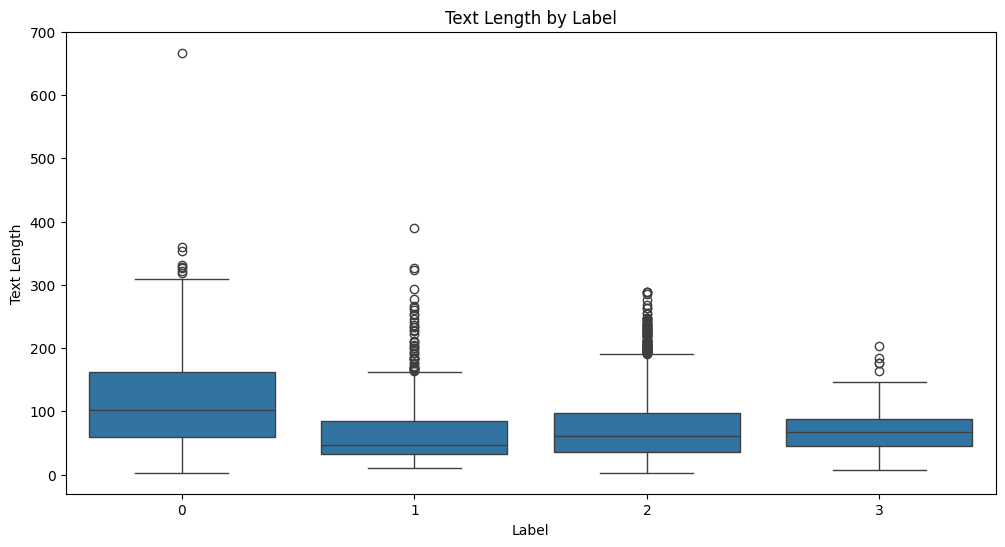

In [9]:
# Calculate the length of each text
data['text_length'] = data['cleaned_text'].apply(len)

# Plot text length distribution by label
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='text_length', data=data)
plt.title('Text Length by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

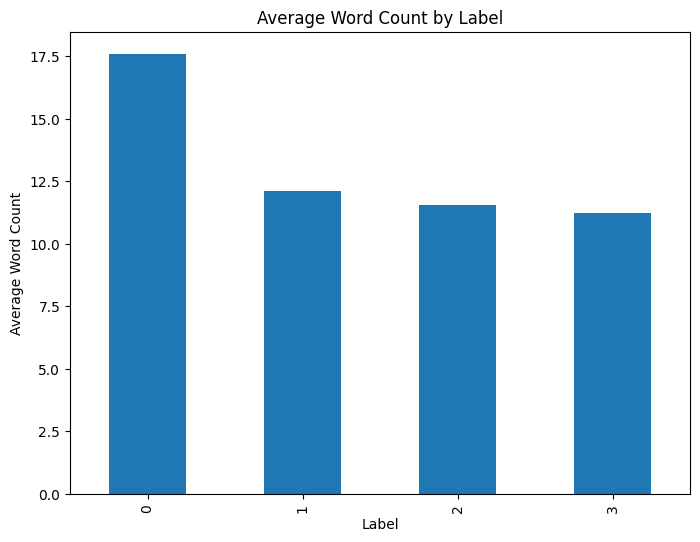

In [10]:
# Calculate the average word count by label
data['word_count'] = data['cleaned_text'].apply(lambda x: len(x.split()))
avg_word_count = data.groupby('label')['word_count'].mean()

# Plot the average word count by label
plt.figure(figsize=(8, 6))
avg_word_count.plot(kind='bar')
plt.title('Average Word Count by Label')
plt.xlabel('Label')
plt.ylabel('Average Word Count')
plt.show()


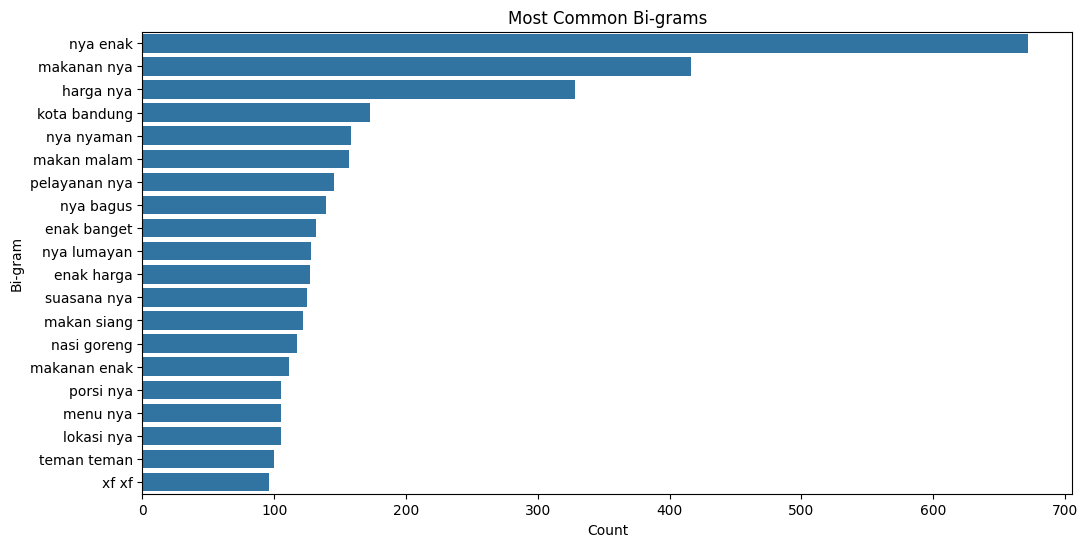

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Generate bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))
X2 = vectorizer.fit_transform(data['cleaned_text'])
bi_grams = X2.sum(axis=0)
bi_gram_freq = [(word, bi_grams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
bi_gram_freq = sorted(bi_gram_freq, key=lambda x: x[1], reverse=True)[:20]

# Plot the most common bi-grams
bi_gram_df = pd.DataFrame(bi_gram_freq, columns=['bi-gram', 'count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='bi-gram', data=bi_gram_df)
plt.title('Most Common Bi-grams')
plt.xlabel('Count')
plt.ylabel('Bi-gram')
plt.show()


### **Model LSTM**

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)


TensorFlow version: 2.15.0
Keras version: 2.15.0
Numpy version: 1.25.2
Pandas version: 2.0.3
Scikit-learn version: 1.2.2


In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/RecognITE-Capstone-Bangkit/Machine-Learning/main/Dataset/dataset_final.csv')
data

,cleaned_text,label,text_length,word_count
0,kadang kemasan paket sesuai harapan kotor rusa...,2,100,15
1,kagum say beliau demokrat sejati walo militer ...,0,68,10
2,roti nya enak banget ice cream enak lokasi jal...,0,116,19
3,bgt ayahmu kalo adikmu bgt mamamu,0,33,6
4,nya asri nyaman makanan harga nya mahal sampan...,0,89,14
...,...,...,...,...
7238,orang kebanyakan sulit menghargai orang,2,39,5
7239,zaman pakai bahasa kampung dasar kampungan,2,42,6
7240,krn rakyat indonesia bodoh tdk membedakan yg y...,1,170,30
7241,lokasi makan lorong sempit mobil masuk jam buk...,0,199,34


In [15]:
# Check untuk missing values
data['cleaned_text'] = data['cleaned_text'].astype(str)

# drop missing values
data['cleaned_text'].fillna('', inplace=True)

In [16]:
# Encode labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(data['cleaned_text'].values)
X = tokenizer.texts_to_sequences(data['cleaned_text'].values)
X = pad_sequences(X)

# Convert labels to categorical
num_classes = len(np.unique(data['label']))
Y = to_categorical(data['label'], num_classes=num_classes)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(Y)


[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [17]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(60, return_sequences=True, recurrent_dropout=0.2))
model.add(Dropout(0.3))  # Experiment with different dropout rates
model.add(LSTM(32))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01)))  # Adjust weight decay

In [18]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
batch_size = 32
epochs = 10

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2, callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 85, 128)           640000    
                                                                 
 spatial_dropout1d (Spatial  (None, 85, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 85, 60)            45360     
                                                                 
 dropout (Dropout)           (None, 85, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                11904     
                                                                 
 dense (Dense)               (None, 4)                 132       
                                                        

In [7]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Training Accuracy: 0.9566540122032166
Validation Accuracy: 0.8277608752250671


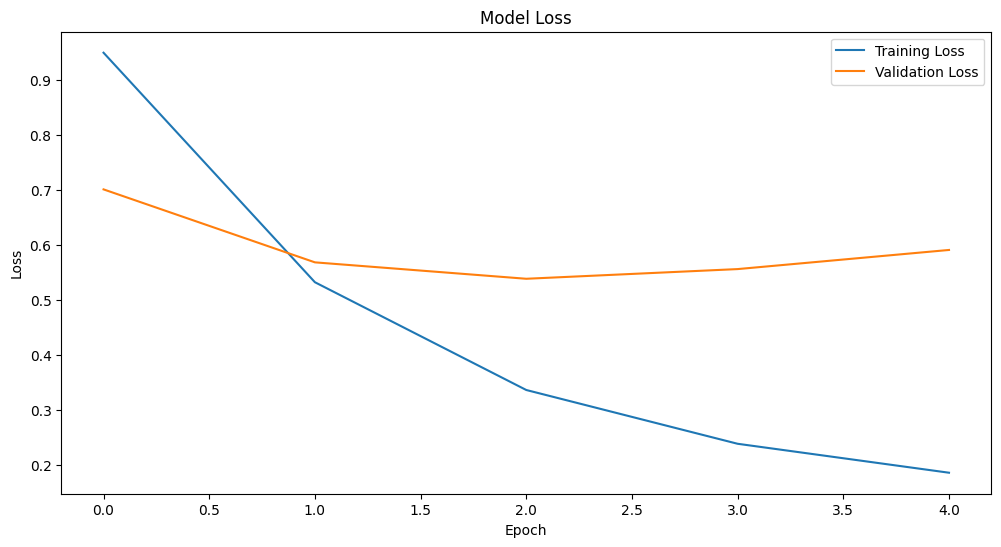

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

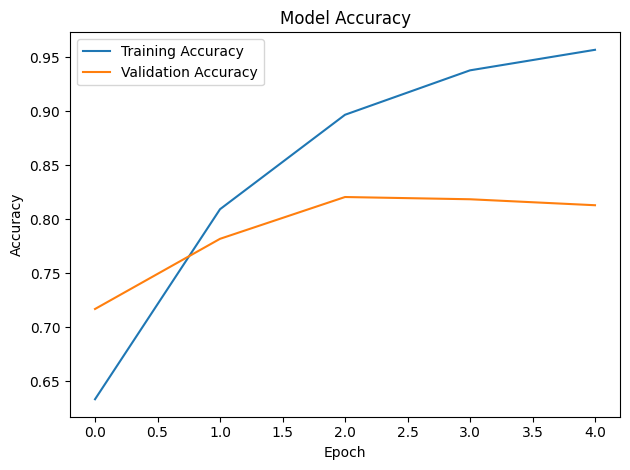

In [41]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [22]:
# Save the model to model.h5
model.save('model_fix.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Predict**

In [23]:
def predict_sentiment(tweet):
    tweet_seq = tokenizer.texts_to_sequences([tweet])
    tweet_pad = pad_sequences(tweet_seq, maxlen=X.shape[1])
    prediction = model.predict(tweet_pad)
    predicted_label = np.argmax(prediction, axis=1)
    original_label = label_encoder.inverse_transform(predicted_label)

    return original_label[0]

test_tweet = "agama lo ga asik"
print("Predicted label:", predict_sentiment(test_tweet))

1/1 [==============================] - 1s 606ms/step
Predicted label: 2


## **Transfer Learning IndoBERT**

In [8]:
!pip install transformers==4.37.2

In [9]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
import numpy as np

In [10]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/RecognITE-Capstone-Bangkit/Machine-Learning/main/Dataset/dataset_final.csv')

In [11]:
# Load IndoBERT model and tokenizer
model_name = "indobenchmark/indobert-base-p2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
indobert_model = TFAutoModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some layers from the model checkpoint at indobenchmark/indobert-base-p2 were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertMode

In [12]:
# Freeze IndoBERT layers
for layer in indobert_model.layers:
    layer.trainable = False

In [13]:
# Tokenize the text data
texts = data['cleaned_text'].astype(str).tolist()
encoded_inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='tf')

input_ids = encoded_inputs['input_ids']
attention_mask = encoded_inputs['attention_mask']
input_ids_np = input_ids.numpy()
attention_mask_np = attention_mask.numpy()
Y = np.array(data['label'])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [14]:
# Split data
X_train, X_test, Y_train, Y_test, attention_mask_train, attention_mask_test = train_test_split(
    input_ids_np, Y, attention_mask_np, test_size=0.2, random_state=42
)

In [15]:
# Define input layers
input_ids_input = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids')
attention_mask_input = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask')

In [16]:
# Get IndoBERT outputs
indobert_output = indobert_model(input_ids_input, attention_mask=attention_mask_input)
sequence_output = indobert_output.last_hidden_state[:, 0, :]  # Use [CLS] token

In [17]:
output = Dense(4, activation='softmax')(sequence_output)

In [18]:
# Define the model
model = Model(inputs=[input_ids_input, attention_mask_input], outputs=output)

In [19]:
# Compile the model
model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()]
)

In [20]:
# Convert labels to one-hot encoding
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with Early Stopping
history = model.fit(
    [X_train, attention_mask_train],
    Y_train_one_hot,
    epochs=20,
    batch_size=32,
    validation_data=([X_test, attention_mask_test], Y_test_one_hot),
    callbacks=[early_stopping]  # Add the Early Stopping callback here
)

Epoch 1/20
182/182 [==============================] - 126s 481ms/step - loss: 0.6930 - categorical_accuracy: 0.7175 - val_loss: 0.5102 - val_categorical_accuracy: 0.7888
Epoch 2/20
182/182 [==============================] - 89s 489ms/step - loss: 0.5049 - categorical_accuracy: 0.7879 - val_loss: 0.4702 - val_categorical_accuracy: 0.8109
Epoch 3/20
182/182 [==============================] - 88s 484ms/step - loss: 0.4643 - categorical_accuracy: 0.8100 - val_loss: 0.4499 - val_categorical_accuracy: 0.8150
Epoch 4/20
182/182 [==============================] - 88s 481ms/step - loss: 0.4562 - categorical_accuracy: 0.8112 - val_loss: 0.4483 - val_categorical_accuracy: 0.8130
Epoch 5/20
182/182 [==============================] - 89s 487ms/step - loss: 0.4390 - categorical_accuracy: 0.8133 - val_loss: 0.4494 - val_categorical_accuracy: 0.8054
Epoch 6/20
182/182 [==============================] - 89s 489ms/step - loss: 0.4349 - categorical_accuracy: 0.8196 - val_loss: 0.4592 - val_categorical_ac

In [22]:
# Evaluate the model
loss, accuracy = model.evaluate([X_test, attention_mask_test], Y_test_one_hot)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

46/46 [==============================] - 16s 337ms/step - loss: 0.4183 - categorical_accuracy: 0.8247
Test Loss: 0.4183, Test Accuracy: 0.8247


In [23]:
import tensorflow as tf
from transformers import TFBertModel

# Custom object dictionary
custom_objects = {'TFBertModel': TFBertModel}

# Save the model using the custom object scope
with tf.keras.utils.custom_object_scope(custom_objects):
    model.save('indobert_classification_model.h5')

# Load the saved model using custom object scope
with tf.keras.utils.custom_object_scope(custom_objects):
    loaded_model = tf.keras.models.load_model('indobert_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import numpy as np
from transformers import BertTokenizerFast
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

def predict_sentiment(tweet):
    # Tokenize and encode the input text
    encoded_tweet = tokenizer(tweet, max_length=128, padding='max_length', truncation=True, return_tensors='np')

    # Extract input IDs and attention masks
    input_ids = encoded_tweet['input_ids']
    attention_mask = encoded_tweet['attention_mask']

    # Make the prediction
    prediction = loaded_model.predict([input_ids, attention_mask])

    # Return the predicted label (assuming a binary classification problem)
    predicted_label = np.argmax(prediction, axis=1)[0]
    return predicted_label

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

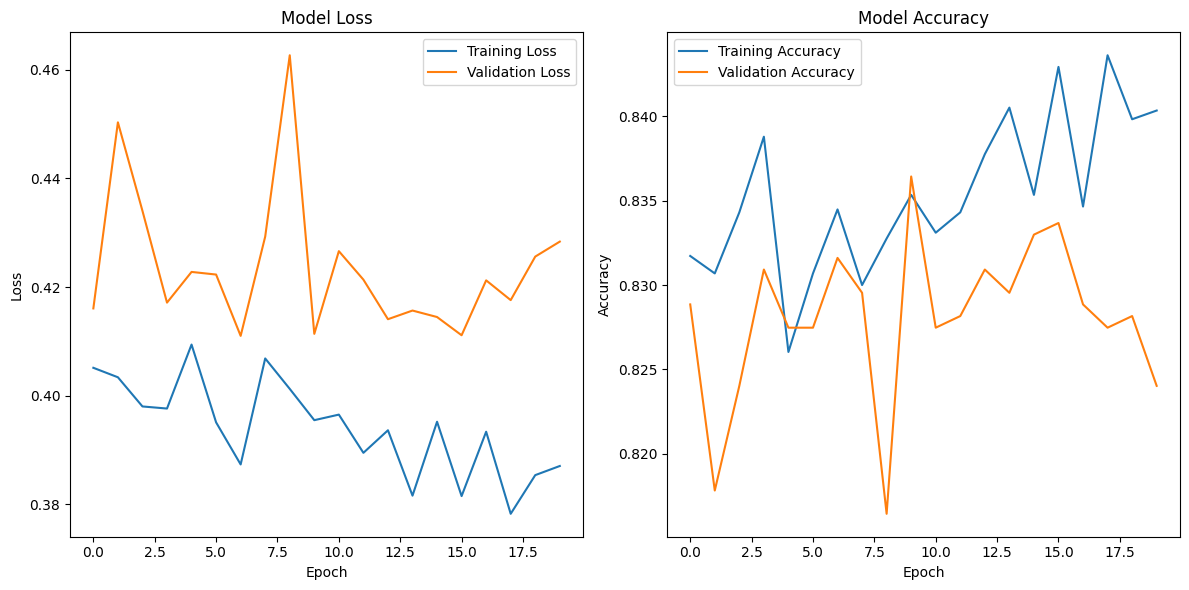

In [27]:
# Plot hasil training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [41]:
# Print training and validation accuracy from the last epoch
train_accuracy_last_epoch = history.history['categorical_accuracy'][-1]
val_accuracy_last_epoch = history.history['val_categorical_accuracy'][-1]

print("Training Accuracy (Last Epoch):", train_accuracy_last_epoch)
print("Validation Accuracy (Last Epoch):", val_accuracy_last_epoch)


Training Accuracy (Last Epoch): 0.8403521180152893
Validation Accuracy (Last Epoch): 0.8240165710449219


In [39]:
# Example usage
test_tweet = "muka macam kodok"
predicted_label = predict_sentiment(test_tweet)
print(f"Predicted label: {predicted_label}")

1/1 [==============================] - 0s 112ms/step
Predicted label: 0


## **Model BiLSTM**


[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 85, 128)           640000    
                                                                 
 spatial_dropout1d_2 (Spati  (None, 85, 128)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional (Bidirection  (None, 85, 120)           90720     
 al)                                                             
                                                                 
 dropout_76 (Dropout)        (None, 85, 120)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                39168     
 onal)                  

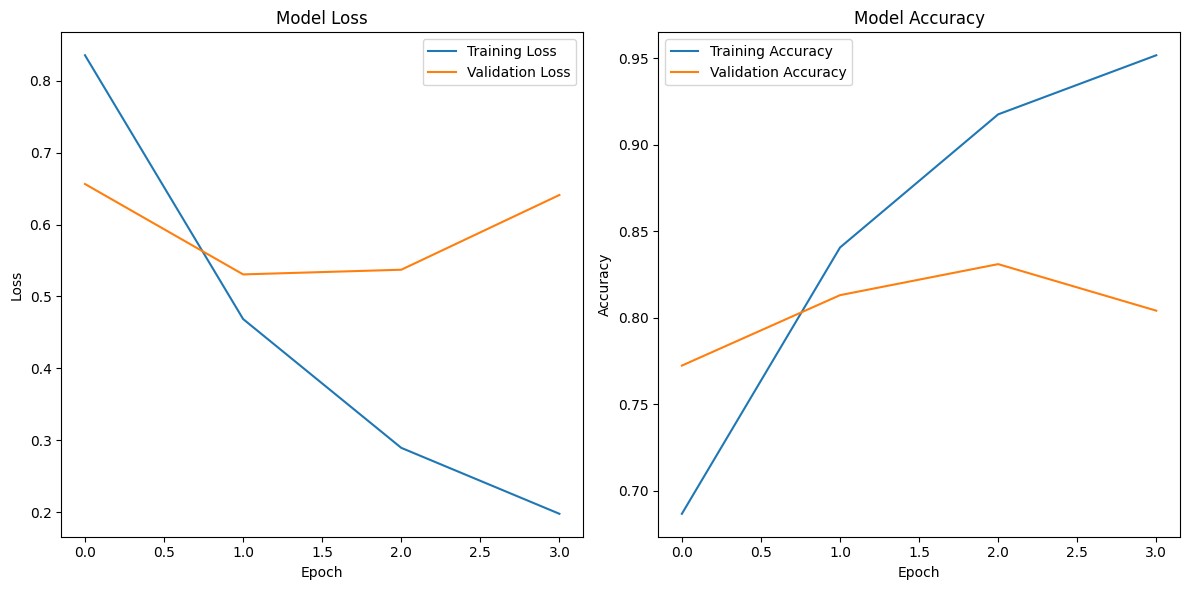

In [42]:
"""Model LSTM"""

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional

data = pd.read_csv('https://raw.githubusercontent.com/RecognITE-Capstone-Bangkit/Machine-Learning/main/Dataset/dataset_final.csv')
data

# Check untuk missing values
data['cleaned_text'] = data['cleaned_text'].astype(str)

# drop missing values
data['cleaned_text'].fillna('', inplace=True)

# Encode labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(data['cleaned_text'].values)
X = tokenizer.texts_to_sequences(data['cleaned_text'].values)
X = pad_sequences(X)

# Convert labels to categorical
num_classes = len(np.unique(data['label']))
Y = to_categorical(data['label'], num_classes=num_classes)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(Y)

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(60, return_sequences=True, recurrent_dropout=0.2)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01)))

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2, callbacks=[early_stopping])

# Evaluate the model
model.evaluate(X_test, Y_test)

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
